# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [17]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from keras.utils.np_utils import to_categorical 
import tensorflow as tf
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


Using TensorFlow backend.


In [0]:
#loading the dataset
from tensorflow.keras.datasets import cifar10

In [0]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [0]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


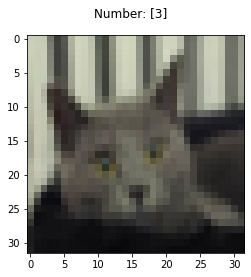

In [0]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

#X_train = np.reshape(X_train,(50000,3072))
#X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#alerady imported in the first line

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#using CNN
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

In [0]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [0]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 82s - loss: 1.5326 - acc: 0.4516 - val_loss: 1.3099 - val_acc: 0.5361
Epoch 2/15
40000/40000 - 82s - loss: 1.1100 - acc: 0.6075 - val_loss: 1.0776 - val_acc: 0.6252
Epoch 3/15
40000/40000 - 81s - loss: 0.8735 - acc: 0.6943 - val_loss: 1.0127 - val_acc: 0.6574
Epoch 4/15
40000/40000 - 80s - loss: 0.6559 - acc: 0.7699 - val_loss: 1.0740 - val_acc: 0.6490
Epoch 5/15
40000/40000 - 81s - loss: 0.4555 - acc: 0.8403 - val_loss: 1.2068 - val_acc: 0.6473
Epoch 6/15
40000/40000 - 81s - loss: 0.2811 - acc: 0.9034 - val_loss: 1.4041 - val_acc: 0.6509
Epoch 7/15
40000/40000 - 80s - loss: 0.1840 - acc: 0.9365 - val_loss: 1.6744 - val_acc: 0.6473
Epoch 8/15
40000/40000 - 80s - loss: 0.1413 - acc: 0.9520 - val_loss: 1.8622 - val_acc: 0.6430
Epoch 9/15
40000/40000 - 80s - loss: 0.1147 - acc: 0.9612 - val_loss: 2.0740 - val_acc: 0.6446
Epoch 10/15
40000/40000 - 80s - loss: 0.1211 - acc: 0.9592 - val_loss: 2.2355 - val_acc: 0.6413

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,613,546
Trainable params: 1,613,546
Non-trainable params: 0
____________________________________________

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [86]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

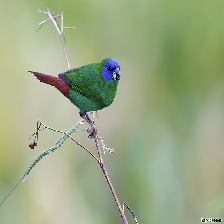

In [228]:
import os
img = load_img('/content/drive/My Drive/49436743043_2441587ab9_c.jpg', target_size=(224, 224))
img

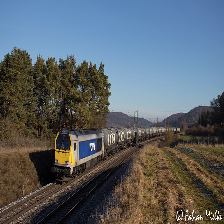

In [229]:
img1 =load_img('/content/drive/My Drive/49438170746_8378201627_c.jpg', target_size=(224, 224))
img1

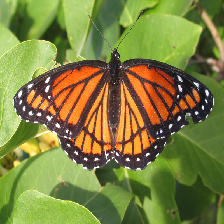

In [230]:
img2 =load_img('/content/49441887332_107afa786d_c.jpg', target_size=(224, 224))
img2

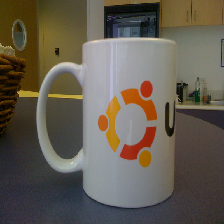

In [231]:
img3 =load_img('/content/4994221690_d070e8a355_c.jpg', target_size=(224, 224))
img3

In [0]:

from tensorflow.keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
img = img_to_array(img)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img1 = img_to_array(img1)

In [0]:
#reshape data for the model
img= img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

In [0]:
img2= img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))
img3= img3.reshape((1, img3.shape[0], img3.shape[1], img3.shape[2]))
img1= img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))

In [0]:

from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16,decode_predictions
# prepare the image for the VGG model
img3 = preprocess_input(img3)
img1 = preprocess_input(img1)
img2 = preprocess_input(img2)

img = preprocess_input(img)


Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:

# predict the probability across all output classes

yhat = model.predict(img)

yhat1 = model.predict(img1)
yhat2 = model.predict(img2)
yhat3 = model.predict(img3)


In [226]:
#Predict Image 1

[[('n02279972', 'monarch', 0.99990356),
  ('n02281406', 'sulphur_butterfly', 8.822267e-05),
  ('n02264363', 'lacewing', 6.523193e-06),
  ('n02281787', 'lycaenid', 1.0233763e-06),
  ('n02277742', 'ringlet', 6.713271e-07)]]

In [0]:
# convert the probabilities to class labels
label1 = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label1 = label1[0][0]


In [242]:
# print the classification
print('%s (%.2f%%)' % (label1[1],label1[2]*100))

hummingbird (36.53%)


#Predict Image 2

In [243]:
# convert the probabilities to class labels
label2 = decode_predictions(yhat1)
# retrieve the most likely result, e.g. highest probability
label2 = label2[0][0]
# print the classification
print('%s (%.2f%%)' % (label2[1], label2[2]*100))

freight_car (34.34%)


#Predict Image 3

In [245]:
# convert the probabilities to class labels
label5 = decode_predictions(yhat2)
# retrieve the most likely result, e.g. highest probability
label5 = label5[0][0]
# print the classification
print('%s (%.2f%%)' % (label5[1], label5[2]*100))

monarch (99.72%)


#Predict Image 4

In [246]:
# convert the probabilities to class labels
label5 = decode_predictions(yhat3)
# retrieve the most likely result, e.g. highest probability
label5 = label5[0][0]
# print the classification
print('%s (%.2f%%)' % (label5[1], label5[2]*100))

coffee_mug (75.90%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


In [312]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
tweets_df= pd.read_csv('/content/tweets.csv',encoding='unicode_escape')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Drop null values**

*   Drop all the rows with null values




In [313]:
tweets_df.dropna(inplace=True)
tweets_df.shape


(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [314]:
tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
import re

tweets_df=tweets_df.applymap(lambda s: s.lower())
tweets_df = tweets_df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
tweets_df = tweets_df.applymap(lambda s: s.strip())

In [317]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

In [0]:
tweets_df=tweets_df[(tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') | (tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]

In [319]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [320]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1, 'negative emotion':0})
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [321]:
PredictColumn="is_there_an_emotion_directed_at_a_brand_or_product"
X=tweets_df['tweet_text']
X.shape

(3191,)

In [322]:
Y = tweets_df[PredictColumn]
Y.shape

(3191,)

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [326]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(2393, 5434)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)

### Fit the classifer
- fit logistic regression classifier

In [328]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# use Naive Bayes to predict the star rating
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [333]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class1 = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class2 = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [336]:
print(metrics.accuracy_score(y_test, y_pred_class1))

0.8446115288220551


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [337]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class2))

0.8571428571428571
